# Notebook 1 – EDA (Exploration des Données)

**Objectif :** Explorer et comprendre le jeu de données Airbnb avant toute modélisation.

Ce notebook contient :
- Le chargement des données
- Un aperçu des variables
- L’analyse des valeurs manquantes
- Des visualisations descriptives (numériques, catégorielles, géographiques)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Options d'affichage
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Chargement des données
df = pd.read_csv("airbnb_train.csv")
print("Shape:", df.shape)
df.head()


Shape: (22234, 28)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,LA,Large bright airy room with 2 balconies and Ja...,NaN,t,f,NaN,2015-12-12,t,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,NYC,Private room for rent in a six bedroom apt wit...,2017-05-07,t,t,100%,2016-11-04,t,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,DC,"14th st corridor 2br/2ba condo, secure boutiqu...",NaN,t,f,NaN,2016-12-11,t,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,NYC,My place is close to Manhattan. You can see th...,2016-10-07,t,t,100%,2012-08-04,f,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,SF,This beautiful home can be your dream destinat...,2016-09-25,t,t,100%,2013-07-25,f,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_verified  22178 non-null

In [3]:
df.describe(include='all')


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
count,2.223400e+04,22234.000000,22234,22234,22234,22234.000000,22183.000000,22234,22234,22234,22234,22234,17509,22178,22178,16759,22178,22234,17518,22234.000000,22234.000000,22234,20148,22234.000000,17256.000000,21931,22208.000000,22199.000000
unique,NaN,NaN,31,3,21160,NaN,NaN,5,5,2,6,22169,2096,2,2,70,2852,2,1042,NaN,NaN,22155,558,NaN,NaN,674,NaN,NaN
top,NaN,NaN,Apartment,Entire home/apt,{},NaN,NaN,Real Bed,strict,True,NYC,Welcome to our unique shared space. This commu...,2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,NaN,NaN,East Village Studio,Williamsburg,NaN,NaN,11211.0,NaN,NaN
freq,NaN,NaN,14635,12348,161,NaN,NaN,21622,9726,16401,9739,3,88,22108,14953,13048,68,16401,420,NaN,NaN,4,878,NaN,NaN,425,NaN,NaN
mean,1.122269e+07,4.783481,NaN,NaN,NaN,3.155573,1.236037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.462971,-92.269305,NaN,NaN,20.670774,94.069077,NaN,1.264769,1.711473
std,6.080480e+06,0.718758,NaN,NaN,NaN,2.143870,0.586246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.071679,21.670081,NaN,NaN,37.183731,7.782235,NaN,0.852819,1.254903
min,3.362000e+03,2.302585,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.339002,-122.510940,NaN,NaN,0.000000,20.000000,NaN,0.000000,0.000000
25%,6.202924e+06,4.317488,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.136082,-118.340633,NaN,NaN,1.000000,92.000000,NaN,1.000000,1.000000
50%,1.217425e+07,4.700480,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.662632,-76.994944,NaN,NaN,6.000000,96.000000,NaN,1.000000,1.000000
75%,1.639502e+07,5.220356,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.746358,-73.954599,NaN,NaN,23.000000,100.000000,NaN,1.000000,2.000000


In [4]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({'missing_values': missing, 'percent': missing_percent})
missing_df


,missing_values,percent
host_response_rate,5475,24.624449
review_scores_rating,4978,22.389134
first_review,4725,21.251237
last_review,4716,21.210758
neighbourhood,2086,9.382028
zipcode,303,1.362778
host_has_profile_pic,56,0.251867
host_identity_verified,56,0.251867
host_since,56,0.251867
bathrooms,51,0.229378


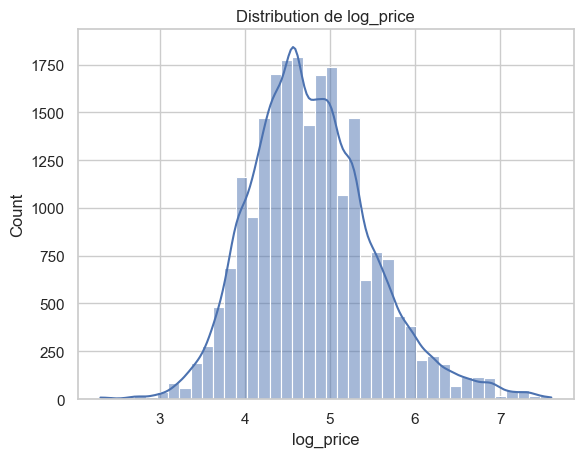

In [5]:
sns.histplot(df['log_price'], kde=True, bins=40)
plt.title("Distribution de log_price")
plt.show()


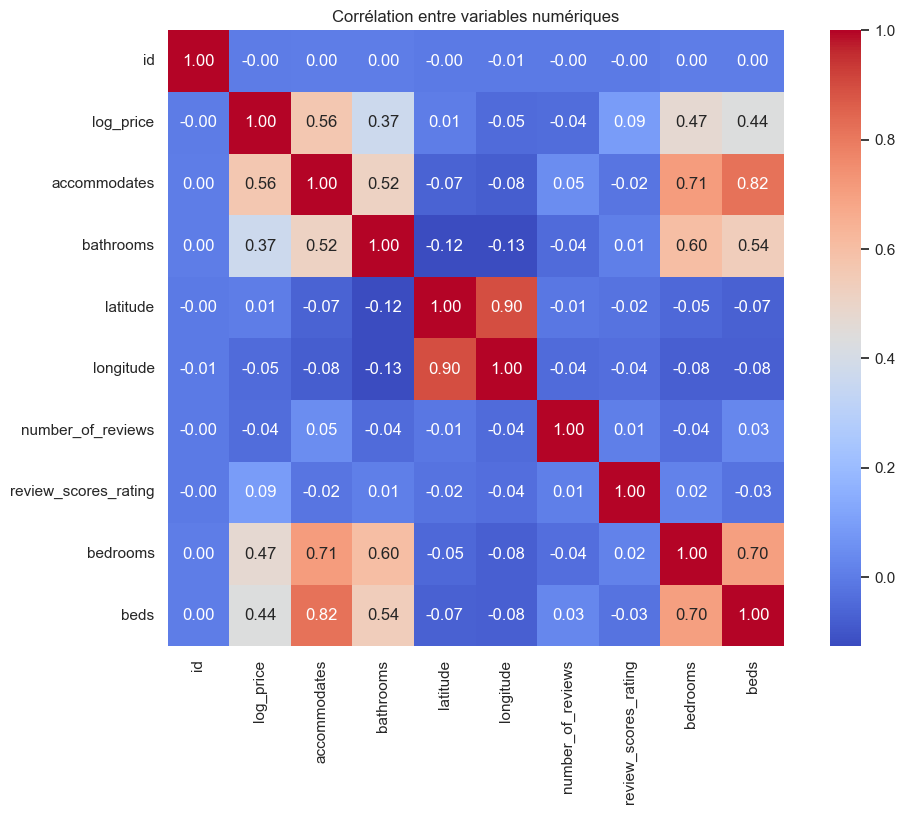

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Corrélation entre variables numériques")
plt.show()


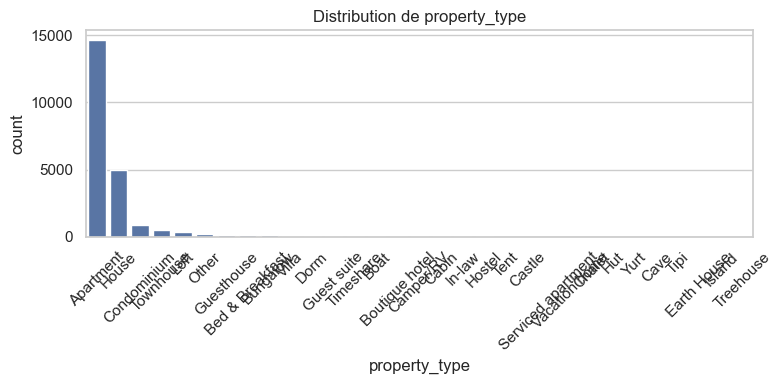

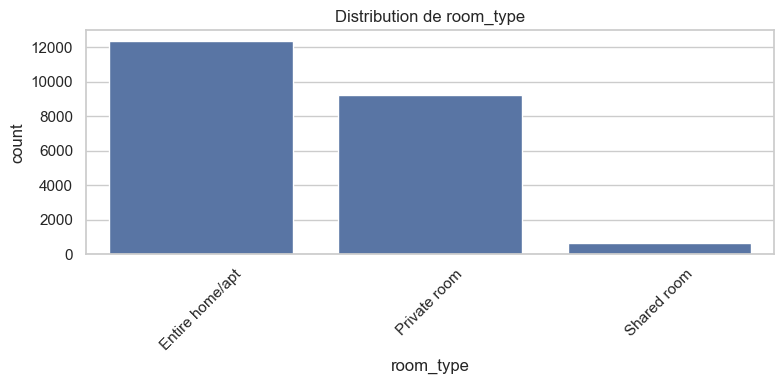

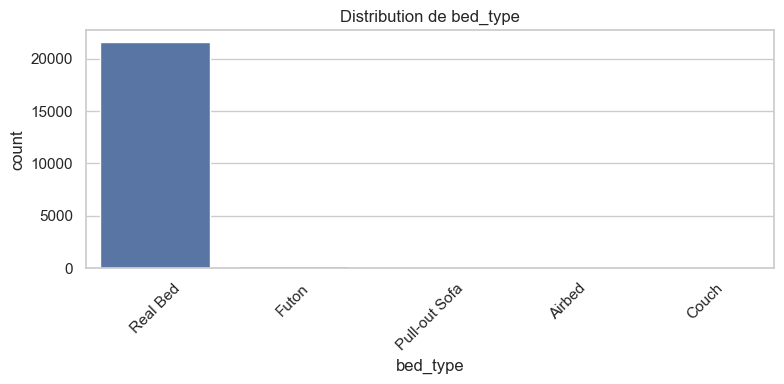

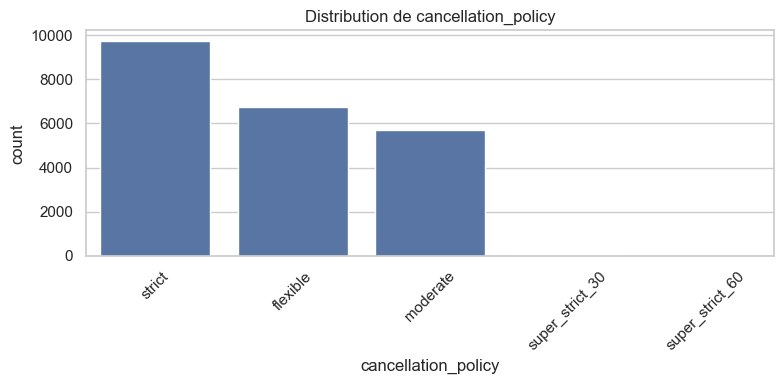

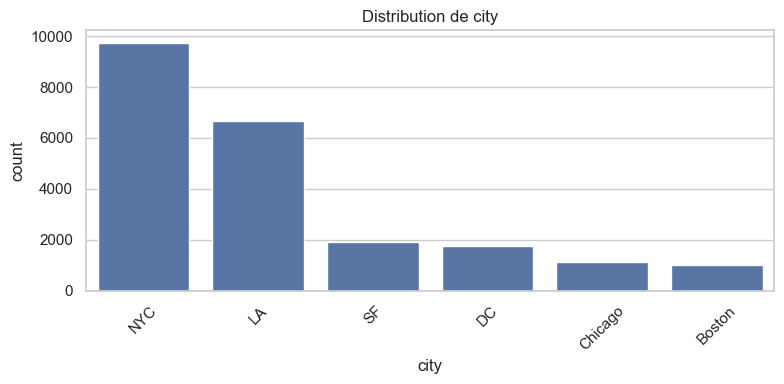

In [7]:
cat_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


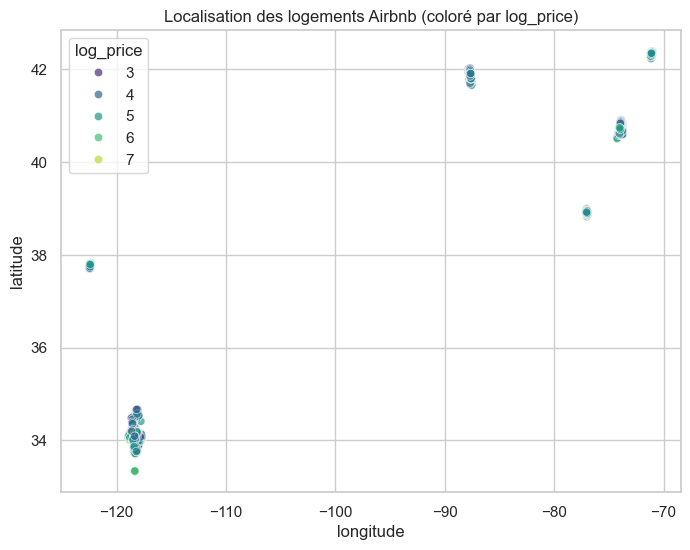

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='log_price', palette="viridis", alpha=0.7)
plt.title("Localisation des logements Airbnb (coloré par log_price)")
plt.show()


## ✅ Conclusion

- Certaines variables contiennent beaucoup de valeurs manquantes (`description`, `review_scores_rating`, etc.)
- Les prix (`log_price`) sont bien distribués mais légèrement asymétriques
- Les types de logements sont variés, avec une forte dominance de certains types
- Il existe une relation géographique entre les coordonnées et les prix

👉 Ces observations guideront les étapes de nettoyage et de création de nouvelles variables dans le prochain notebook.
